In [1]:
import pandas as pd

df = pd.read_csv('../Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [2]:
# remove non numeric

data = df.iloc[:, 1:]
data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


In [3]:
data_centered = data - data.mean()
data_centered.describe()

,books,tv_shows,video_games
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.287859e-16,-3.434290e-16,-3.730349e-16
std,1.917761e+00,6.455870e-01,8.280661e-01
min,-2.993333e+00,-1.586000e+00,-1.543333e+00
25%,-2.193333e+00,-3.860000e-01,-7.433333e-01
50%,2.066667e-01,-8.600000e-02,-4.333333e-02
75%,1.506667e+00,3.140000e-01,5.566667e-01
max,3.206667e+00,2.014000e+00,2.056667e+00


In [5]:
# modeling

from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(data_centered)


,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [6]:
pca2.explained_variance_ratio_

array([0.88175186, 0.08603611])

In [7]:
pca3 = PCA(n_components=3)
pca3.fit(data_centered)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [8]:
pca3.explained_variance_ratio_

array([0.88175186, 0.08603611, 0.03221203])

In [9]:
sum(pca3.explained_variance_ratio_)

np.float64(1.0)

#### Interpreting PCA results

In [10]:
pca2.components_

array([[ 0.93143032, -0.11629655,  0.34483717],
       [-0.04900906,  0.89884697,  0.43551376]])

In [11]:
data_centered.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

- Rows - components (PC1 and PC2)
- Column - original dimensions

PC1 - higher in books
PC2 - higher in tv_shows

In [12]:
data_centered.head()

,books,tv_shows,video_games
0,-2.493333,0.014,-0.943333
1,-2.993333,-0.086,-1.043333
2,-2.493333,-0.086,-0.843333
3,0.506667,-0.086,0.756667
4,-0.193333,-0.786,-0.243333


In [13]:
data_pca = pd.DataFrame(pca2.transform(data_centered), columns  = ['PC1', 'PC2'])
data_pca

,PC1,PC2
0,-2.649291,-0.276055
1,-3.137860,-0.384986
2,-2.603177,-0.322388
3,0.742853,0.227407
4,-0.172578,-0.802994
...,...,...
145,2.418106,0.364630
146,3.094283,0.238320
147,2.845479,1.687070
148,-3.186000,1.227374


Text(0, 0.5, 'More TV shows')

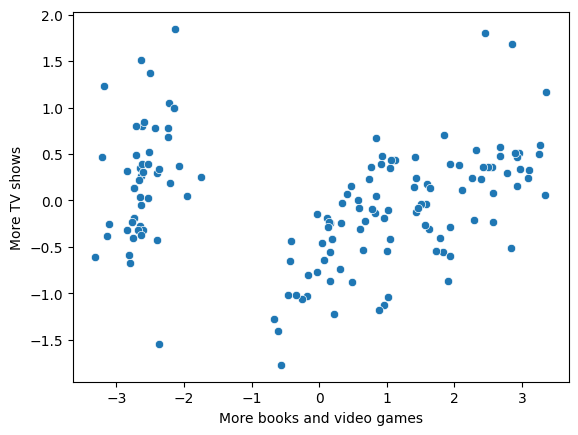

In [14]:
# vizualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'PC1', y = 'PC2', data = data_pca)
plt.xlabel('More books and video games')
plt.ylabel('More TV shows')

### TSNE

In [15]:
data

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6
...,...,...,...
145,5.2,4.6,6.9
146,6.0,4.6,6.7
147,5.5,5.7,7.7
148,0.0,6.1,5.2


In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

data_tsne = tsne.fit_transform(data)

data_tsne

array([[-2.26008377e+01,  7.17649746e+00],
       [-2.34351673e+01,  6.40976620e+00],
       [-2.25721912e+01,  6.83517838e+00],
       [ 9.26465130e+00, -6.98507428e-01],
       [ 1.37513514e+01,  1.15377295e+00],
       [ 4.54540586e+00, -7.57475376e+00],
       [ 7.90742970e+00, -2.79585171e+00],
       [ 1.26692610e+01, -7.49920011e-01],
       [-2.30668564e+01,  6.30259228e+00],
       [ 1.02941303e+01, -1.98591948e+00],
       [ 6.65311193e+00, -4.82873058e+00],
       [-2.27231846e+01,  7.98442936e+00],
       [-1.99497356e+01,  7.46281958e+00],
       [-2.19852505e+01,  7.50543356e+00],
       [-2.06789894e+01,  9.24300194e+00],
       [-1.78703690e+01,  1.01480608e+01],
       [ 1.08746614e+01, -9.43200767e-01],
       [-2.10444355e+01,  8.24062252e+00],
       [ 3.63977551e+00, -7.94787979e+00],
       [ 6.06003094e+00, -8.28820419e+00],
       [ 9.02521229e+00, -2.01247478e+00],
       [ 1.06661425e+01,  1.90893209e+00],
       [ 1.15970144e+01,  1.11787111e-01],
       [ 5.

<Axes: xlabel='component1', ylabel='component2'>

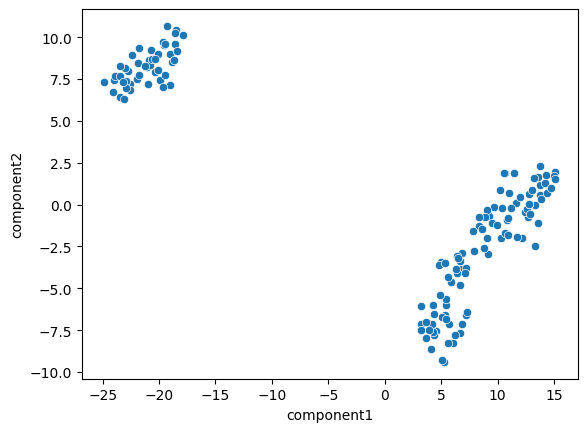

In [17]:
df_tsne = pd.DataFrame(data_tsne, columns = ['component1', 'component2'])

sns.scatterplot(x ='component1', y = 'component2', data = df_tsne )